In [1]:
# only adjust settings in this cell
state = 'NE'
root_name = 'Douglas'  # which county will root our first district 
k = 3                  # the state has this number of districts
deviation = 1          # use: L=ideal_population-deviation, U=ideal_population-deviation
obj_type = 'cut_edges' # compactness objectives: cut_edges, perimeter, or inverse_polsby_popper

In [2]:
filepath = '..\\dat\\'
filename = state + '_county.json'

from util import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
print("State has total of k =",G._k,"districts")

State has total of k = 3 districts


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 653834
Single district upper population limit U = 653835


In [5]:
# Require this county be in our first district
G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Douglas County to be the root. In our graph, this is vertex # 76


In [6]:
from optimization import districting_heuristic
import time

start_time = time.perf_counter()
plans = districting_heuristic(G, obj_type='cut_edges', enumeration_limit=10)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-16
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i9-13900K, instruction set [SSE2|AVX|AVX2]
Thread count: 24 physical cores, 32 logical processors, using up to 32 threads

Optimize a model with 745 rows, 880 columns and 3738 nonzeros
Model fingerprint: 0xa8538c0f
Variable types: 463 continuous, 417 integer (417 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+06]
Presolve removed 125 rows and 138 columns
Presolve time: 0.00s
Presolved: 620 rows, 742 columns, 2925 nonzeros
Variable types: 423 continuous, 319 integer (319 binary)

Root relaxation: objective 5.471193e+00, 312 iterations, 0.00 

In [7]:
print("Number of plans =",len(plans))
print("Total time =",time.perf_counter() - start_time)

Number of plans = 20
Total time = 347.58332090004114


# cut_edges perimeter ave_invpp
0 84 52.9757 8.7751
1 80 50.7867 8.0289
2 84 52.8502 8.716
3 82 50.7582 8.0252
4 83 52.2546 8.5061
5 83 51.3478 8.2016
6 79 50.7697 8.0315
7 81 51.0065 8.0774
8 83 51.7734 8.378
9 83 51.874 8.3759
10 86 53.139 8.7514
11 89 53.4952 8.8301
12 88 53.5509 8.8836
13 91 54.2954 9.164
14 91 54.671 9.185
15 88 53.5883 8.7493
16 89 53.6993 8.9031
17 91 54.1533 8.9787
18 90 54.9266 9.2419
19 85 53.8482 9.0303


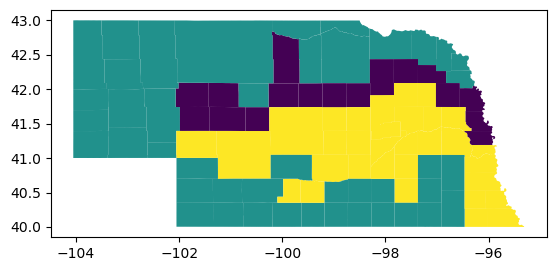

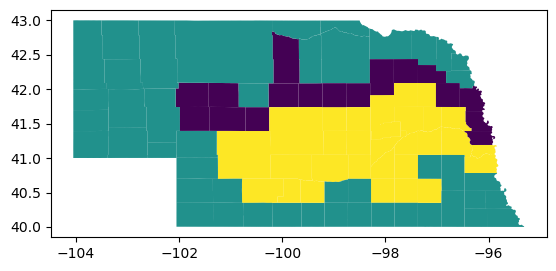

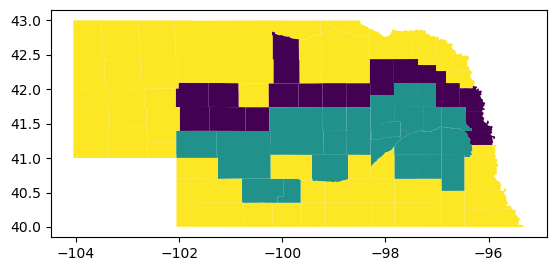

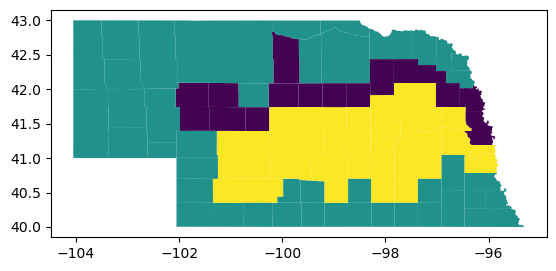

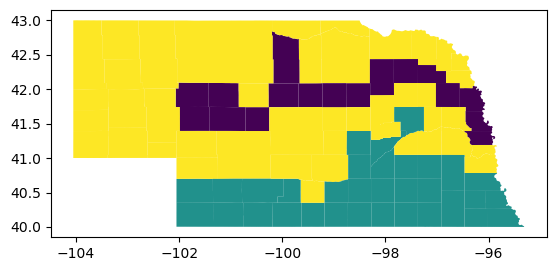

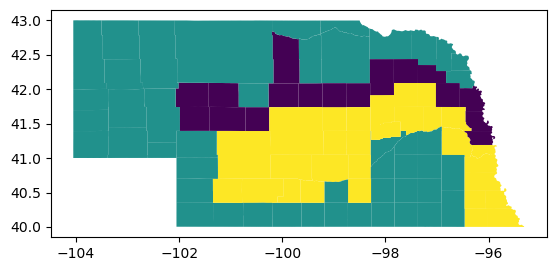

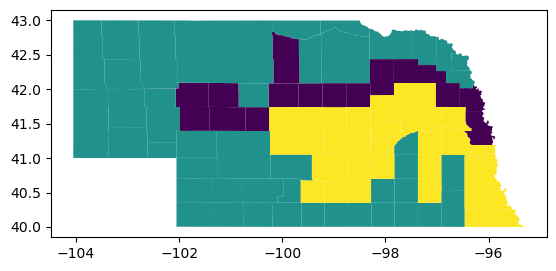

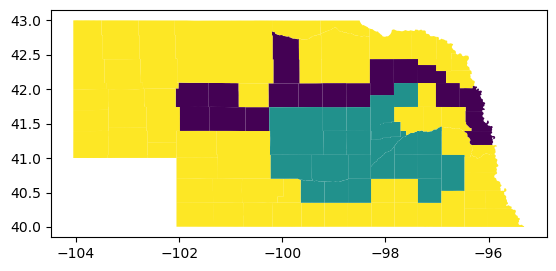

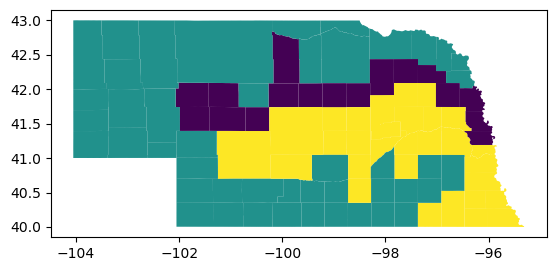

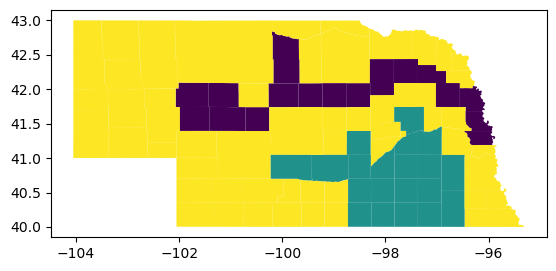

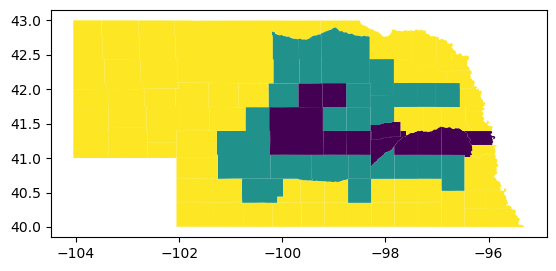

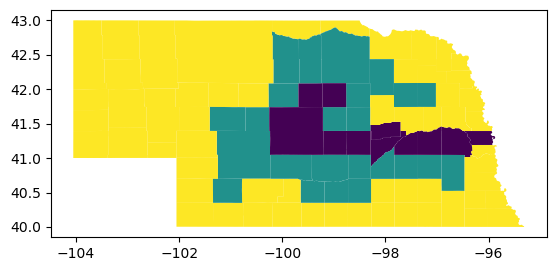

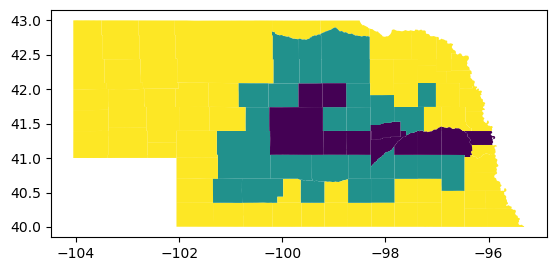

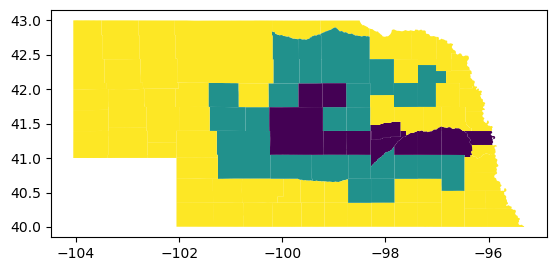

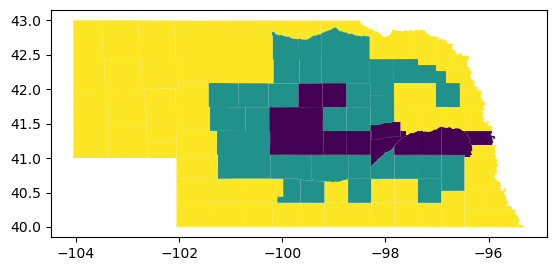

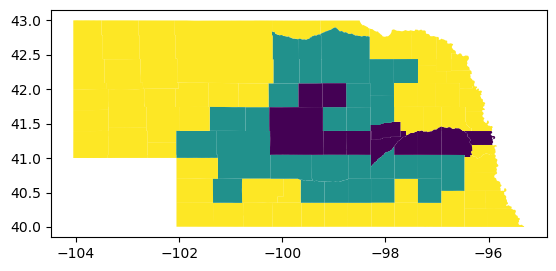

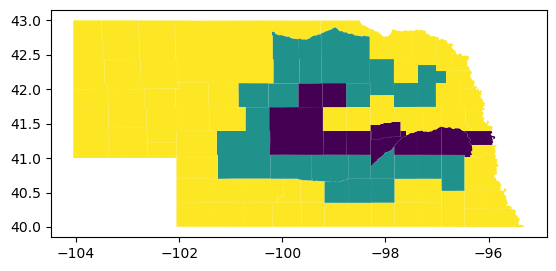

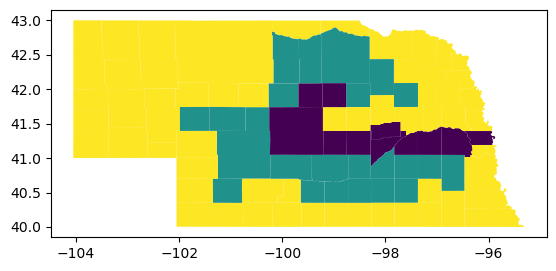

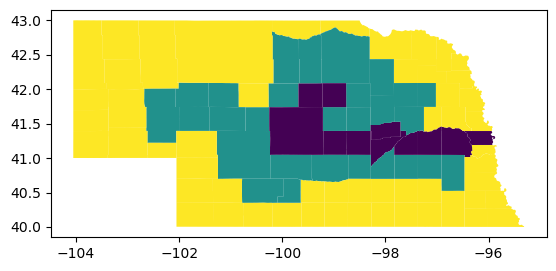

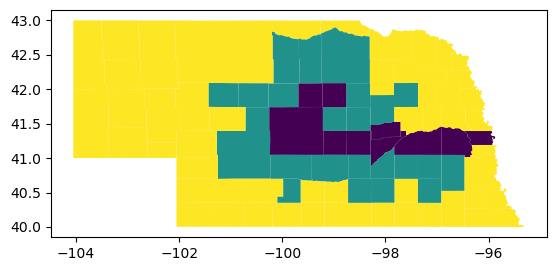

In [8]:
from util import plan_objective
from draw import draw_plan
filename = state + '_county.shp'

print("# cut_edges perimeter ave_invpp")
for p in range(len(plans)):
    plan = plans[p]
    ce = round( plan_objective(G, plan, 'cut_edges') )
    pe = round( plan_objective(G, plan, 'perimeter'), 4)
    pp = round( plan_objective(G, plan, 'inverse_polsby_popper'), 4)
    print(p, ce, pe, pp) #, plan)
    draw_plan( filepath, filename, G, plan )

In [9]:
print("plans =",plans)

plans = [[[3, 8, 9, 11, 14, 26, 27, 38, 46, 56, 74, 75, 76, 77, 83, 89, 92], [0, 5, 12, 15, 17, 21, 22, 23, 24, 25, 29, 32, 33, 34, 35, 39, 41, 42, 45, 47, 48, 51, 52, 53, 54, 55, 57, 58, 60, 61, 62, 63, 64, 66, 67, 68, 73, 79, 80, 84, 85, 87, 88, 90], [1, 2, 4, 6, 7, 10, 13, 16, 18, 19, 20, 28, 30, 31, 36, 37, 40, 43, 44, 49, 50, 59, 65, 69, 70, 71, 72, 78, 81, 82, 86, 91]], [[3, 8, 9, 11, 14, 26, 27, 38, 46, 56, 74, 75, 76, 77, 83, 89, 92], [0, 5, 6, 12, 15, 17, 21, 23, 24, 25, 28, 29, 32, 33, 34, 35, 41, 42, 45, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 62, 63, 64, 65, 66, 67, 68, 69, 73, 79, 80, 84, 85, 87, 90, 91], [1, 2, 4, 7, 10, 13, 16, 18, 19, 20, 22, 30, 31, 36, 37, 39, 40, 43, 44, 50, 59, 61, 70, 71, 72, 78, 81, 82, 86, 88]], [[3, 8, 9, 11, 14, 26, 27, 38, 46, 56, 74, 75, 76, 77, 83, 89, 92], [1, 2, 4, 10, 13, 16, 18, 20, 21, 30, 31, 39, 40, 43, 44, 47, 49, 59, 70, 72, 78, 81, 82, 86], [0, 5, 6, 7, 12, 15, 17, 19, 22, 23, 24, 25, 28, 29, 32, 33, 34, 35, 36, 37, 41, 42, 45,